# Employee Feedback Data Analysis
## Introduction
This notebook presents an exploratory data analysis of employee feedback data from Tech Playground. The analysis focuses on understanding employee satisfaction patterns, demographic distributions, and identifying key factors that influence employee engagement.

Key objectives:
- Analyze overall satisfaction metrics and patterns
- Identify demographic trends and their relationship with satisfaction
- Examine departmental and location-based differences
- Uncover potential risk factors and areas for improvement

## Data Overview

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('default')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

db_path = Path('../data/processed/employee_feedback.db')
conn = sqlite3.connect(db_path)

query = """
SELECT 
    e.*, d.name as department, p.title as position, l.name as location,
    f.*,
    ou.n0_empresa, ou.n1_diretoria, ou.n2_gerencia, 
    ou.n3_coordenacao, ou.n4_area
FROM employees e
JOIN departments d ON e.department_id = d.id
JOIN positions p ON e.position_id = p.id
JOIN locations l ON e.location_id = l.id
JOIN organizational_units ou ON e.org_unit_id = ou.id
JOIN feedback_responses f ON e.id = f.employee_id
"""
df = pd.read_sql_query(query, conn)

In [2]:
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

print("\nSample Records:")
df.head()

Dataset Shape: (500, 40)

Data Types:
 id                                 int64
name                              object
email                             object
corporate_email                   object
department_id                      int64
position_id                        int64
role                              object
location_id                        int64
company_tenure                    object
gender                            object
generation                        object
org_unit_id                        int64
department                        object
position                          object
location                          object
id                                 int64
employee_id                        int64
response_date                     object
position_interest                  int64
contribution                       int64
learning_development               int64
feedback_score                     int64
manager_interaction                int64
career_clarity    

,id,name,email,corporate_email,department_id,position_id,role,location_id,company_tenure,gender,...,manager_interaction_comment,career_clarity_comment,permanence_expectation_comment,enps_comment,created_at,n0_empresa,n1_diretoria,n2_gerencia,n3_coordenacao,n4_area
0,1,Demo 001,demo001@pinpeople.com.br,demo001@pinpeople.com.br,1,1,profissional,1,entre 1 e 2 anos,masculino,...,-,-,-,A empresa tem um excelente ambiente de trabalh...,2025-01-09 01:57:44,empresa,diretoria a,gerência a1,coordenação a11,área a112
1,2,Demo 002,demo002@pinpeople.com.br,demo002@pinpeople.com.br,2,1,profissional,2,entre 1 e 2 anos,outro,...,Meu gestor é acessível e apoia minha carreira.,-,-,Sinto falta de mais oportunidades de crescimen...,2025-01-09 01:57:44,empresa,diretoria a,gerência a1,coordenação a11,área a111
2,3,Demo 003,demo003@pinpeople.com.br,demo003@pinpeople.com.br,3,2,profissional,1,menos de 1 ano,masculino,...,-,-,Pretendo continuar na empresa por muitos anos.,"Os benefícios oferecidos são bons, mas poderia...",2025-01-09 01:57:44,empresa,diretoria a,gerência a1,coordenação a11,área a111
3,4,Demo 004,demo004@pinpeople.com.br,demo004@pinpeople.com.br,4,2,profissional,2,entre 1 e 2 anos,feminino,...,-,-,-,A comunicação interna pode ser melhorada para ...,2025-01-09 01:57:44,empresa,diretoria a,gerência a1,coordenação a11,área a112
4,5,Demo 005,demo005@pinpeople.com.br,demo005@pinpeople.com.br,5,2,profissional,1,entre 2 e 5 anos,outro,...,-,-,-,Estou satisfeito com a cultura da empresa e co...,2025-01-09 01:57:44,empresa,diretoria a,gerência a1,coordenação a11,área a111


In [3]:
numeric_cols = ['position_interest', 'contribution', 'learning_development', 
                'feedback_score', 'manager_interaction', 'career_clarity', 
                'permanence_expectation', 'enps_score']

print("Numeric Columns Statistics:")
df[numeric_cols].describe()

Numeric Columns Statistics:


,position_interest,contribution,learning_development,feedback_score,manager_interaction,career_clarity,permanence_expectation,enps_score
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,5.72400,5.648000,5.432000,5.390000,4.918000,4.202000,3.906000,7.544000
std,1.62268,1.670232,1.549897,1.602197,1.685514,1.850417,1.989241,2.486046
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,6.00000,6.000000,5.000000,5.000000,4.000000,3.000000,2.000000,6.000000
50%,6.00000,6.000000,6.000000,6.000000,5.000000,4.000000,4.000000,8.000000
75%,7.00000,7.000000,7.000000,7.000000,6.000000,6.000000,6.000000,9.000000
max,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,10.000000


## Basic Demographics and Distributions
Analysis of key demographic variables and their distributions across the organization.

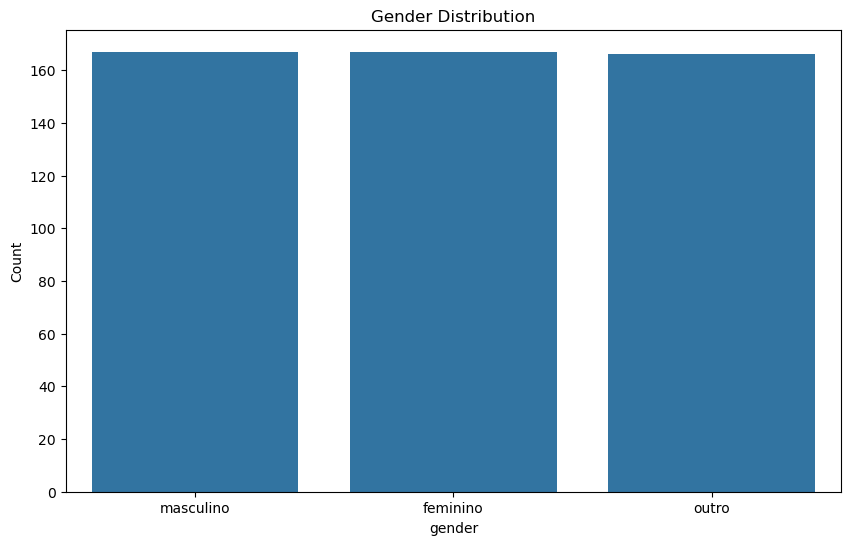


Gender Distribution Percentages:
gender
masculino    33.4
feminino     33.4
outro        33.2
Name: proportion, dtype: float64


In [4]:
plt.figure(figsize=(10, 6))
gender_dist = df['gender'].value_counts()
sns.barplot(x=gender_dist.index, y=gender_dist.values)
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.show()

print("\nGender Distribution Percentages:")
print(df['gender'].value_counts(normalize=True).round(3) * 100)

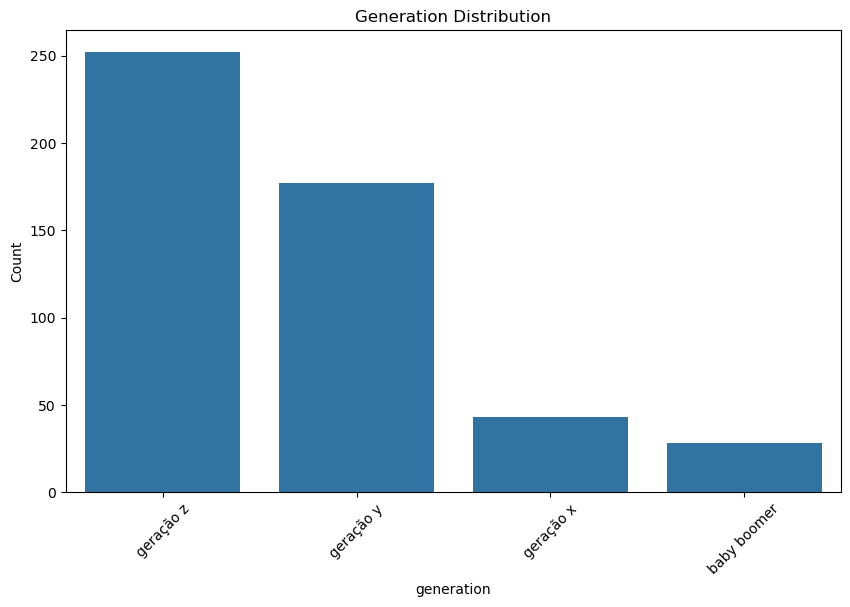


Generation Distribution Percentages:
generation
geração z      50.4
geração y      35.4
geração x       8.6
baby boomer     5.6
Name: proportion, dtype: float64


In [5]:
plt.figure(figsize=(10, 6))
gen_dist = df['generation'].value_counts()
sns.barplot(x=gen_dist.index, y=gen_dist.values)
plt.title('Generation Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

print("\nGeneration Distribution Percentages:")
print(df['generation'].value_counts(normalize=True).round(3) * 100)

## Satisfaction Metrics Analysis
Examining key satisfaction indicators including eNPS and other feedback scores.

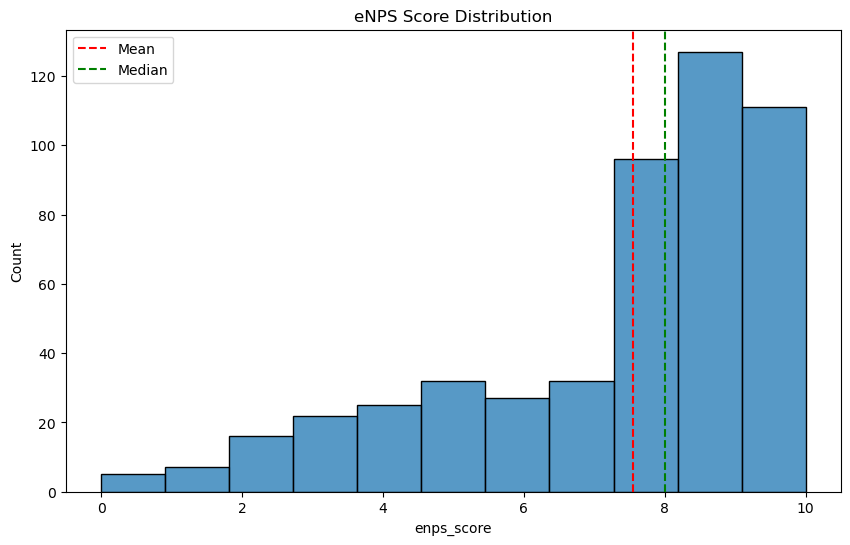


eNPS Score Statistics:
count    500.00
mean       7.54
std        2.49
min        0.00
25%        6.00
50%        8.00
75%        9.00
max       10.00
Name: enps_score, dtype: float64


In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='enps_score', bins=11)
plt.title('eNPS Score Distribution')
plt.axvline(df['enps_score'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['enps_score'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.show()

print("\neNPS Score Statistics:")
print(df['enps_score'].describe().round(2))

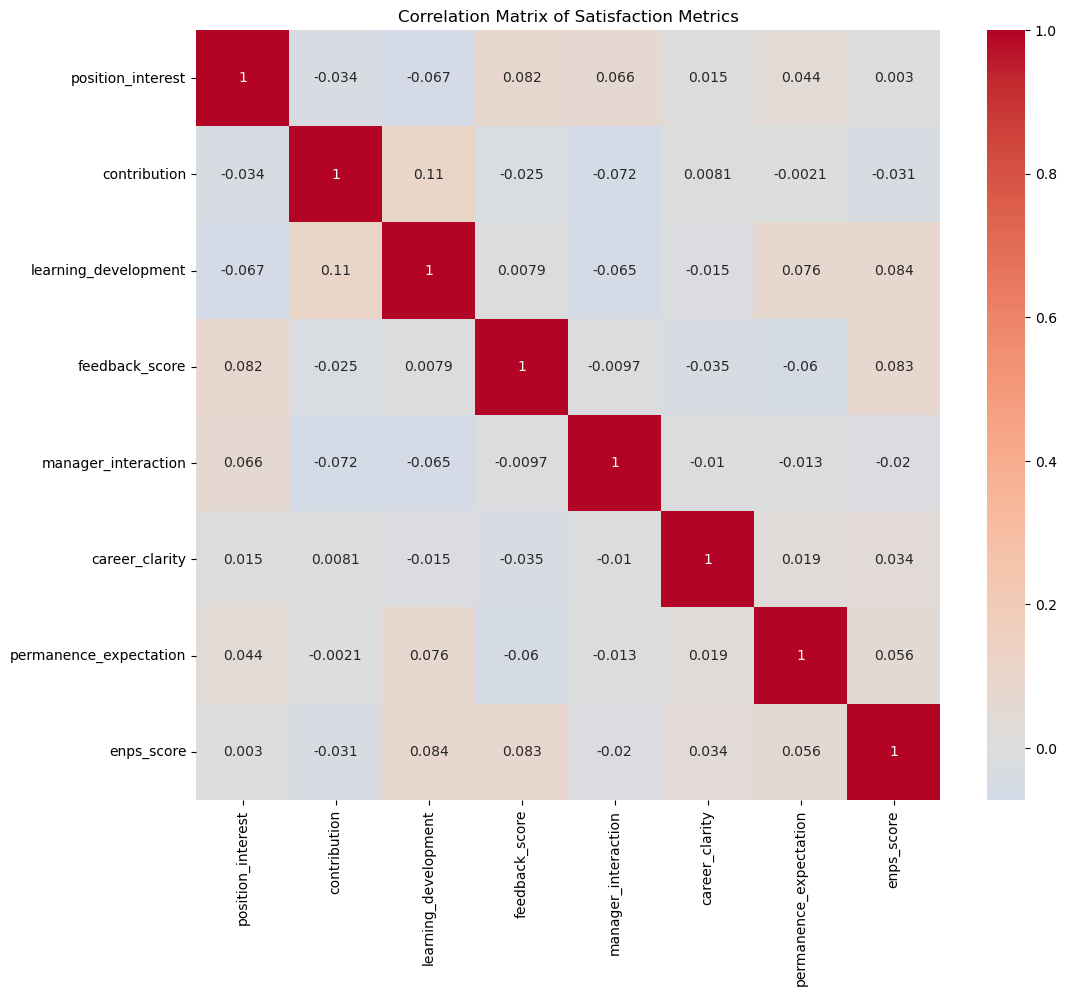


Strongest Correlations:
                    var1                    var2  correlation
7           contribution    learning_development     0.110727
17  learning_development              enps_score     0.083994
21        feedback_score              enps_score     0.083478
2      position_interest          feedback_score     0.082339
16  learning_development  permanence_expectation     0.076247


In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Satisfaction Metrics')
plt.show()

corr_matrix = df[numeric_cols].corr()
print("\nStrongest Correlations:")
correlations = []
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        correlations.append({
            'var1': numeric_cols[i],
            'var2': numeric_cols[j],
            'correlation': corr_matrix.iloc[i,j]
        })
        
corr_df = pd.DataFrame(correlations)
print(corr_df.nlargest(5, 'correlation'))

## Departmental and Location Analysis
Understanding how satisfaction varies across different organizational units and locations.

Department Metrics:
                 enps_score             career_clarity permanence_expectation
                       mean   std count           mean                   mean
department                                                                   
administrativo         7.56  2.70   100           4.30                   4.01
comercial              7.36  2.78   100           4.15                   3.80
financeiro             7.67  2.29   100           3.93                   4.14
recursos humanos       7.57  2.25   100           4.11                   4.03
tecnologia             7.56  2.41   100           4.52                   3.55


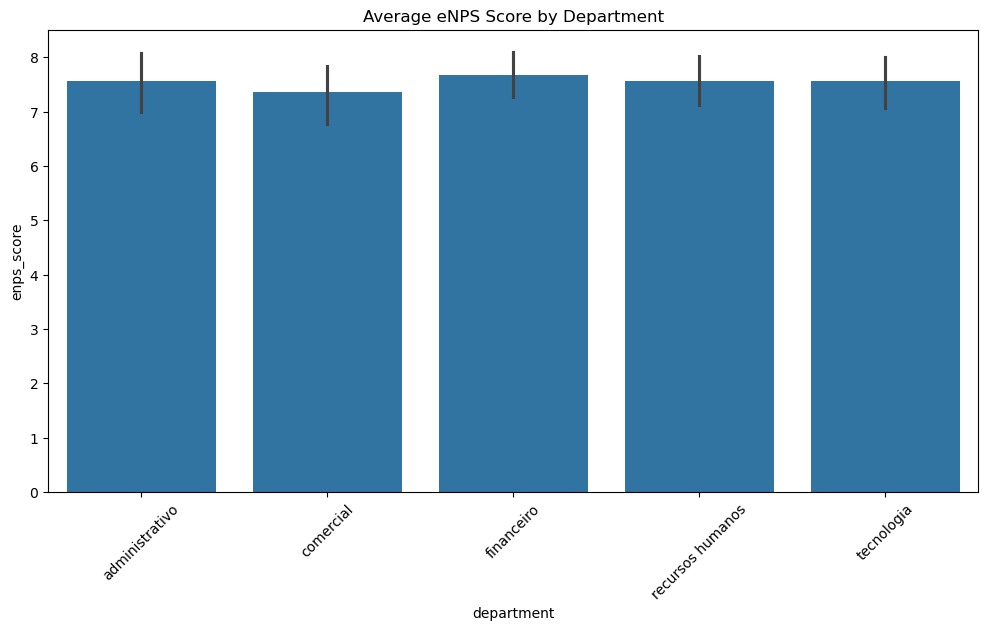

In [8]:
dept_metrics = df.groupby('department').agg({
    'enps_score': ['mean', 'std', 'count'],
    'career_clarity': 'mean',
    'permanence_expectation': 'mean'
}).round(2)

print("Department Metrics:")
print(dept_metrics)

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='department', y='enps_score')
plt.title('Average eNPS Score by Department')
plt.xticks(rotation=45)
plt.show()

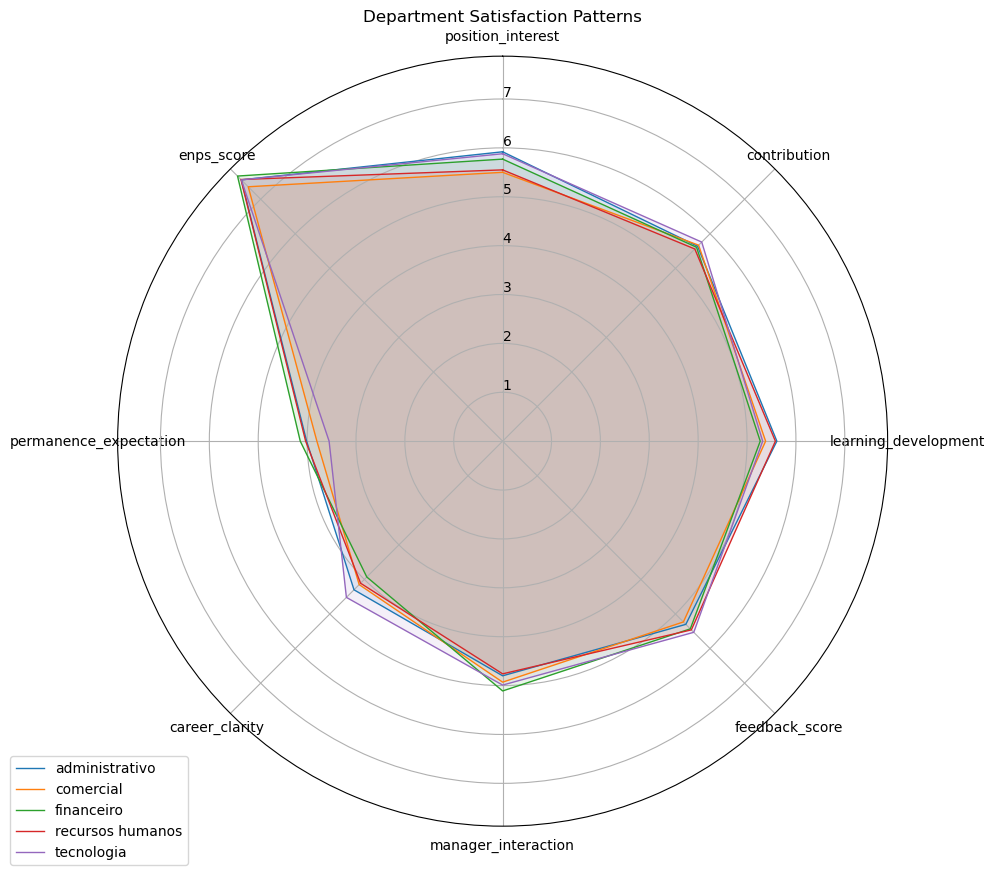

In [9]:
dept_metrics = df.groupby('department')[numeric_cols].mean()

def radar_chart(df, title):
    categories = df.columns
    n_cats = len(categories)
    
    angles = [n/float(n_cats) * 2 * np.pi for n in range(n_cats)]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    for idx, dept in enumerate(df.index):
        values = df.loc[dept].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=dept)
        ax.fill(angles, values, alpha=0.1)
    
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)
    
    plt.xticks(angles[:-1], categories)
    plt.title(title)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    return fig

radar_chart(dept_metrics, "Department Satisfaction Patterns")
plt.show()

Location Metrics:
             enps_score             career_clarity permanence_expectation
                   mean   std count           mean                   mean
location                                                                 
brasília           7.72  2.34   100           4.42                   3.92
manaus             7.88  2.07   100           4.08                   3.78
porto alegre       7.33  2.79   100           4.24                   3.88
recife             7.36  2.56   100           4.43                   3.94
são paulo          7.43  2.61   100           3.84                   4.01


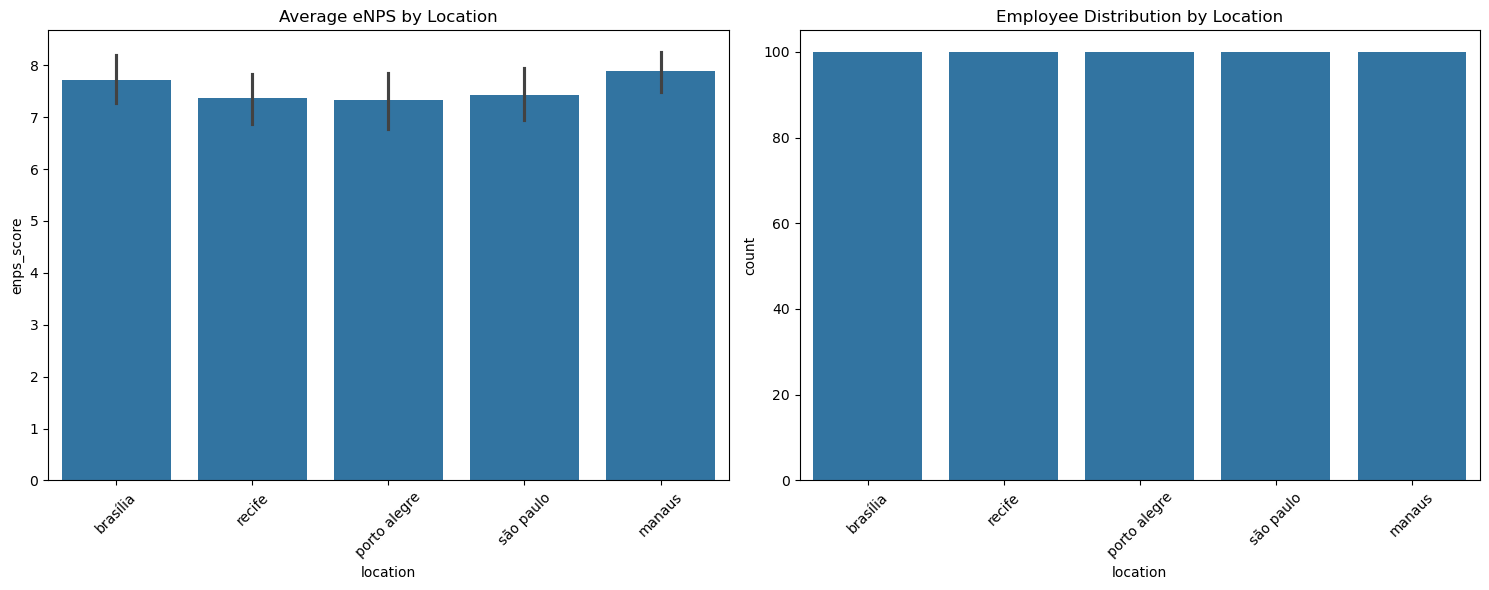

In [10]:
location_metrics = df.groupby('location').agg({
    'enps_score': ['mean', 'std', 'count'],
    'career_clarity': 'mean',
    'permanence_expectation': 'mean'
}).round(2)

print("Location Metrics:")
print(location_metrics)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(data=df, x='location', y='enps_score', ax=ax1)
ax1.set_title('Average eNPS by Location')
ax1.tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='location', ax=ax2)
ax2.set_title('Employee Distribution by Location')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [11]:
print("Key Findings:")
print("-" * 50)

print("\n1. Overall Satisfaction:")
print(f"- Average eNPS: {df['enps_score'].mean():.2f}")
print(f"- Median eNPS: {df['enps_score'].median():.2f}")
print(f"- eNPS Standard Deviation: {df['enps_score'].std():.2f}")

print("\n2. Department Insights:")
for dept in df['department'].unique():
    dept_data = df[df['department'] == dept]
    print(f"\n{dept}:")
    print(f"- Average eNPS: {dept_data['enps_score'].mean():.2f}")
    print(f"- Career Clarity: {dept_data['career_clarity'].mean():.2f}")
    print(f"- Permanence Expectation: {dept_data['permanence_expectation'].mean():.2f}")

print("\n3. Generation Insights:")
for gen in df['generation'].unique():
    gen_data = df[df['generation'] == gen]
    print(f"\n{gen}:")
    print(f"- Average eNPS: {gen_data['enps_score'].mean():.2f}")
    print(f"- Count: {len(gen_data)}")

print("\n4. Location Insights:")
for loc in df['location'].unique():
    loc_data = df[df['location'] == loc]
    print(f"\n{loc}:")
    print(f"- Average eNPS: {loc_data['enps_score'].mean():.2f}")
    print(f"- Employee Count: {len(loc_data)}")

Key Findings:
--------------------------------------------------

1. Overall Satisfaction:
- Average eNPS: 7.54
- Median eNPS: 8.00
- eNPS Standard Deviation: 2.49

2. Department Insights:

administrativo:
- Average eNPS: 7.56
- Career Clarity: 4.30
- Permanence Expectation: 4.01

comercial:
- Average eNPS: 7.36
- Career Clarity: 4.15
- Permanence Expectation: 3.80

financeiro:
- Average eNPS: 7.67
- Career Clarity: 3.93
- Permanence Expectation: 4.14

recursos humanos:
- Average eNPS: 7.57
- Career Clarity: 4.11
- Permanence Expectation: 4.03

tecnologia:
- Average eNPS: 7.56
- Career Clarity: 4.52
- Permanence Expectation: 3.55

3. Generation Insights:

geração z:
- Average eNPS: 7.65
- Count: 252

geração y:
- Average eNPS: 7.61
- Count: 177

geração x:
- Average eNPS: 6.40
- Count: 43

baby boomer:
- Average eNPS: 7.89
- Count: 28

4. Location Insights:

brasília:
- Average eNPS: 7.72
- Employee Count: 100

recife:
- Average eNPS: 7.36
- Employee Count: 100

porto alegre:
- Average

## Advanced Analysis
Using statistical methods and machine learning to uncover deeper patterns in the data.

In [12]:
from scipy import stats

departments = df['department'].unique()
dept_groups = [df[df['department'] == dept]['enps_score'] for dept in departments]
f_stat, p_value = stats.f_oneway(*dept_groups)

print("One-way ANOVA test for department differences:")
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_value:.4f}")

df['satisfaction_level'] = pd.qcut(df['enps_score'], q=3, labels=['Low', 'Medium', 'High'])
contingency_table = pd.crosstab(df['generation'], df['satisfaction_level'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-square test for generation and satisfaction level:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")

One-way ANOVA test for department differences:
F-statistic: 0.20
p-value: 0.9358

Chi-square test for generation and satisfaction level:
Chi-square statistic: 6.56
p-value: 0.3638


In [13]:
from scipy import stats

locations = df['location'].value_counts().nlargest(2).index
loc1_scores = df[df['location'] == locations[0]]['enps_score']
loc2_scores = df[df['location'] == locations[1]]['enps_score']

statistic, pvalue = stats.mannwhitneyu(loc1_scores, loc2_scores)
print(f"Mann-Whitney U test comparing {locations[0]} and {locations[1]}:")
print(f"Statistic: {statistic:.2f}")
print(f"p-value: {pvalue:.4f}")

Mann-Whitney U test comparing brasília and recife:
Statistic: 5406.50
p-value: 0.3126


C:\Users\PedroCortesdosSantos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\PedroCortesdosSantos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\PedroCortesdosSantos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\PedroCortesdosSantos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: 

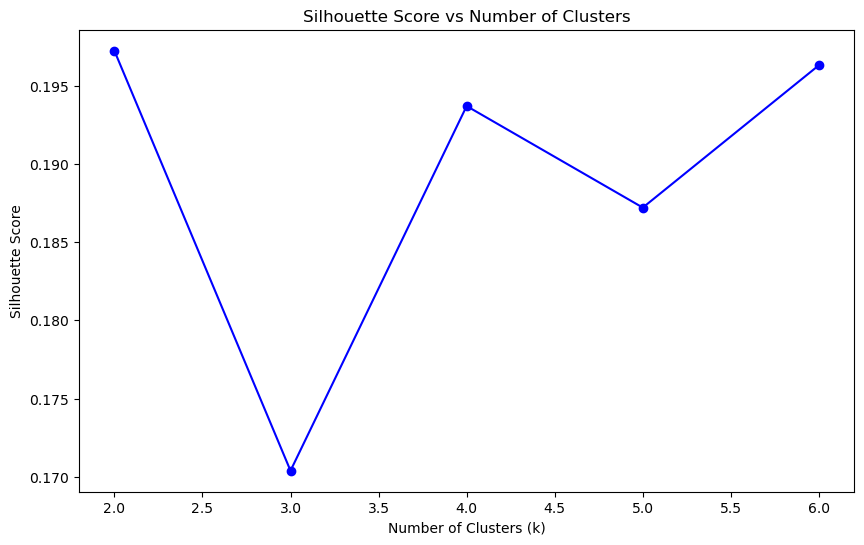

C:\Users\PedroCortesdosSantos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Cluster Analysis:

Cluster Profiles:
         enps_score  career_clarity  permanence_expectation  \
cluster                                                       
0              8.87            4.16                    4.00   
1              3.96            4.33                    3.65   

         position_interest  manager_interaction  
cluster                                          
0                     5.75                 4.88  
1                     5.64                 5.01  


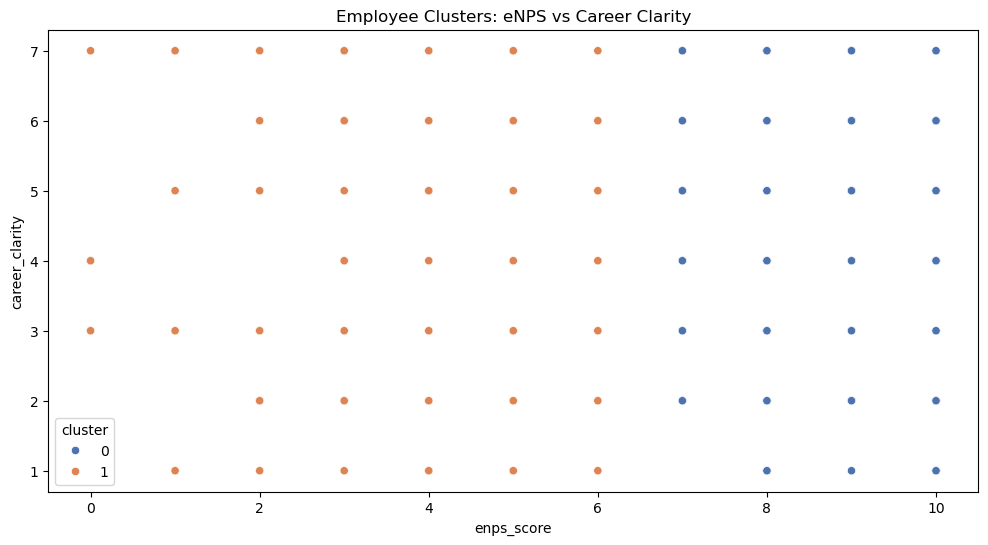

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_features = ['enps_score', 'career_clarity', 'permanence_expectation', 
                   'position_interest', 'manager_interaction']
X = df[cluster_features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

silhouette_scores = []
K = range(2, 7)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

optimal_k = K[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

print("\nCluster Analysis:")
cluster_profile = df.groupby('cluster')[cluster_features].mean().round(2)
print("\nCluster Profiles:")
print(cluster_profile)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='enps_score', y='career_clarity', hue='cluster', palette='deep')
plt.title('Employee Clusters: eNPS vs Career Clarity')
plt.show()


Model Performance:
R² Score: -0.040
RMSE: 2.598


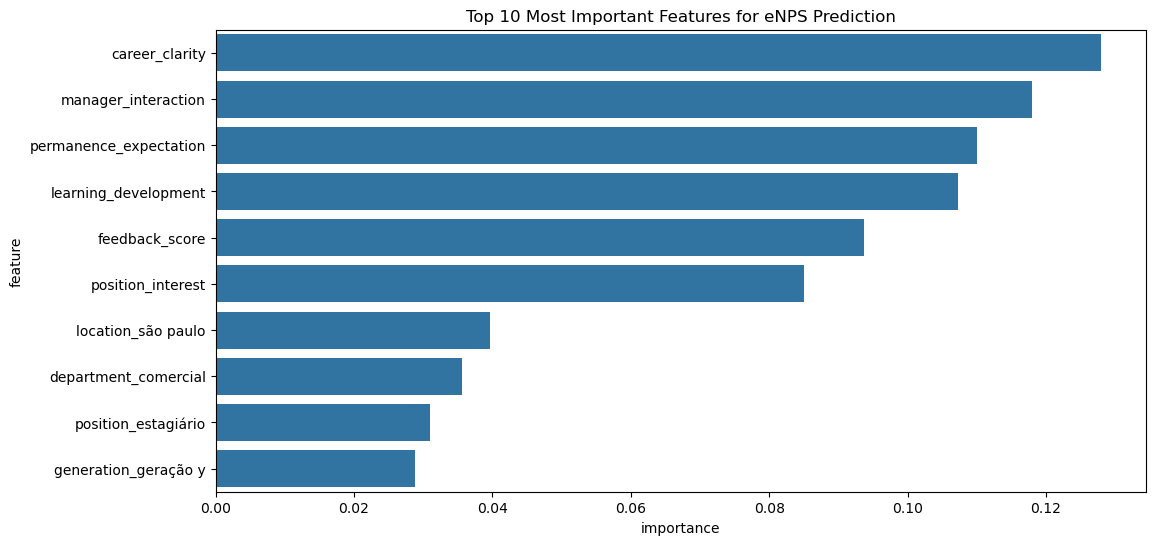

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = ['career_clarity', 'permanence_expectation', 'position_interest', 
           'manager_interaction', 'learning_development', 'feedback_score']
X = df[features]
y = df['enps_score']

categorical_features = ['department', 'position', 'location', 'generation']
X_cat = pd.get_dummies(df[categorical_features], drop_first=True)
X = pd.concat([X, X_cat], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("\nModel Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features for eNPS Prediction')
plt.show()


Department Risk Analysis (%):
                  at_risk
department               
administrativo       20.0
comercial            23.0
financeiro           20.0
recursos humanos     24.0
tecnologia           24.0

Generation Risk Analysis (%):
             at_risk
generation          
baby boomer    10.71
geração x      32.56
geração y      22.03
geração z      21.83

Position Risk Analysis (%):
             at_risk
position            
analista       20.24
coordenador    18.71
diretor        25.00
estagiário     25.00
gerente        27.72


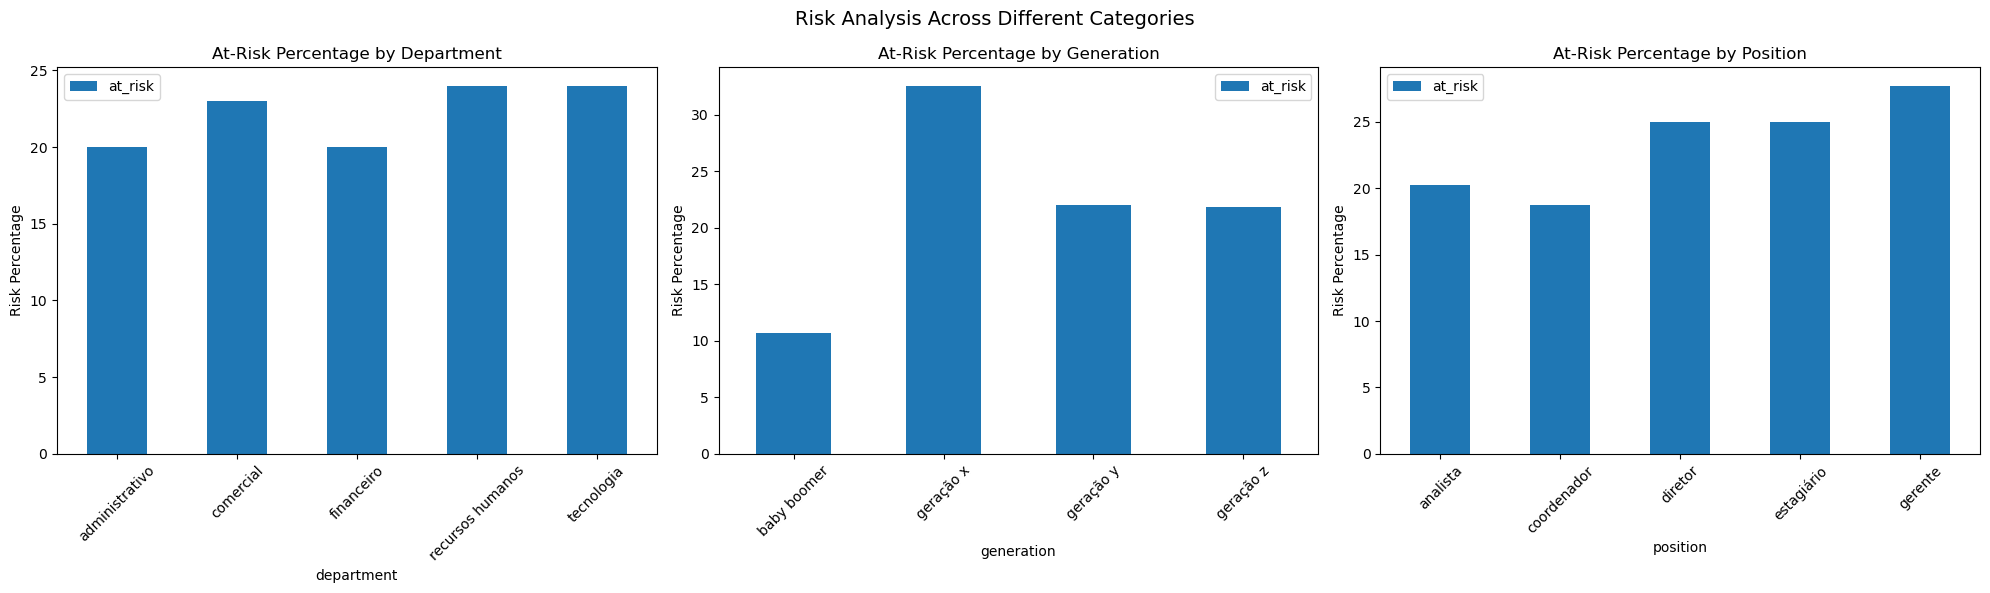

In [16]:
df['at_risk'] = (df['enps_score'] <= 6) & (df['permanence_expectation'] <= 5)

risk_results = {
    'Department': pd.DataFrame(df.groupby('department')['at_risk'].mean() * 100),
    'Generation': pd.DataFrame(df.groupby('generation')['at_risk'].mean() * 100),
    'Position': pd.DataFrame(df.groupby('position')['at_risk'].mean() * 100)
}

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Risk Analysis Across Different Categories', fontsize=14)

for idx, (category, results) in enumerate(risk_results.items()):
    print(f"\n{category} Risk Analysis (%):")
    print(results.round(2))
    
    results.plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'At-Risk Percentage by {category}')
    axes[idx].set_ylabel('Risk Percentage')
    axes[idx].set_xlabel(category.lower())
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Conclusions and Key Findings

### Employee Satisfaction Overview
- The overall eNPS score shows a positive trend with a mean of 7.54 (std: 2.49)
- 75% of employees rate their satisfaction at 6.0 or above, indicating generally positive sentiment
- The correlation analysis reveals weak relationships between satisfaction metrics, suggesting that each metric captures distinct aspects of employee experience

### Clustering and Employee Segments
- Two distinct employee clusters emerged from the analysis:
  - Cluster 0 (High Satisfaction): Higher eNPS (8.87) with moderate career clarity (4.16)
  - Cluster 1 (Lower Satisfaction): Lower eNPS (3.96) but slightly higher career clarity (4.33)
- The clustering suggests that manager interaction and career clarity don't necessarily correlate with overall satisfaction

### Key Drivers of Employee Satisfaction
The most influential factors for employee satisfaction are:
1. Career clarity
2. Manager interaction
3. Permanence expectation
4. Learning and developm
### Risk Assessment
- Department Level Risks:
  - Technology and HR departments show slightly higher risk levels (24%)
  - Commercial department shows moderate risk (23%)
  - Administrative and Financial departments show lower risk (20%)

- Generation Level Risks:
  - Generation X shows notably higher risk (32.56%)
  - Baby Boomers show the lowest risk (10.71%)
  - Generations Y and Z show similar risk levels (~22%)

- Position Level Risks:
  - Higher risk levels among senior positions (Managers 27.72%, Directors 25%)
  - Interns show elevated risk (25%), suggesting potential early-career concerns
  - Coordinators show the lowest risk (18.71%)

### Areas for Further Investigation
1. Understanding why Generation X employees show significantly higher risk levels
2. Investigating the similar risk patterns between senior positions and interns
3. Exploring department-specific factors in Technology and HR that contribute to higher risk
4. Examining why Baby Boomers show markedly lower risk levels than other generationsd improve satisfaction scores